#Nama : Rizki Nofrian Wahyudi
#Universitas : Universitas Tarumanagara
#Kelas : Atlas


The 4Ws of Problem Scoping 

Kasus		: Klasifikasi Pasien

WHO - Siapa yang memiliki masalah tersebut?
1.	Siapa saja yang mengalami masalah tsb?
masyarakan, dokter dan seterusnya
____________________________________________________________________

2.	Siapa saja yang terlibat dalam masalah tsb?
Lingkungan, Masyarkat, Pemangku kebijakan, Rumah sakit dan intasi lainnya
____________________________________________________________________

3.	Apa yang kamu ketahui tentang mereka?
Fasilitas yang dapat membantu Mengklasifikasikan kategori CAD dan Normal untuk kebaikan masa depan
____________________________________________________________________

WHAT - Apa permasalahannya sebenarnya?
1.	Apa masalah utamanya?
Sebagian orang tidak menyadari bahwa dia adalah termasuk kategori CAD atau Normal maka system ini dibuat
____________________________________________________________________
2.	Apa faktor-faktor pendukung masalah tsb? (bisa tampilkan data/jurnal/info pendukung lainnya)
https://www.tagar.id/5-penyakit-paling-mematikan-yang-sering-dianggap-sepele
Dalam halaman situ ini dijelaskan bahwa penyakit CAD mematikan yang dianggap sepele, dimana dapat diihat bahwa gejala yang ditimbulkan tidak terlalu terlihat saat di awal maka system ini dapat membantu manusia untuk mengkasifikasikannya
____________________________________________________________________

WHERE - Dimana/pada saat apa permasalahan ini muncul?
1.	Dimana saja si calon “user” mengalami masalah ini?
Dikehidupan sehari-hari
____________________________________________________________________
2.	Pada kondisi seperti apa si calon “user” mengalami masalah ini?
gejala yang dialami saat makin parah maka user akan sangat megetahuinnnya
____________________________________________________________________

WHY - Mengapa kamu yakin masalah ini sangat penting dibahas?
1.	Apa nilai utama dari permasalahan ini?
Nilai utama dari pemasalahan ini dapat membantu pasien dan tenaga kesehatan dalam mengkategorikan penyakit CAD 
____________________________________________________________________
2.	Bagaimana kamu bisa memperbaiki (sebagian atau seluruh) dari masalah tsb?
-	Teknologi yang daoat mengkasifikasikan seseorang dengan cepat dan memiliki akurasi yang baik

____________________________________________________________________

 
Ringkasan

Subjek : masyarakan, dokter dan seterusnya
Punya masalah berupa :	pendeteksian penyakit CAD	
pada saat:	Di kehidupan atau di rumah sakit	
Solusi idealnya:	Membuat aplikasi dalam mengklasifikasikan CAD


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00412/Z-Alizadeh%20sani%20dataset.xlsx

--2022-03-20 01:56:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00412/Z-Alizadeh%20sani%20dataset.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123618 (121K) [application/x-httpd-php]
Saving to: ‘Z-Alizadeh sani dataset.xlsx’

Z-Alizadeh sani dat 100%[===================>] 120.72K   310KB/s    in 0.4s    

2022-03-20 01:56:26 (310 KB/s) - ‘Z-Alizadeh sani dataset.xlsx’ saved [123618/123618]



EDA


Data Knowledge

In [5]:
df = pd.read_excel('Z-Alizadeh sani dataset.xlsx')



In [6]:
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [8]:
df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'BBB', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'Cath'],
      dtype='object')

In [12]:
X = df.drop(columns=['Cath'],axis=1)
y = df['Cath']

X.shape, y.shape

((303, 55), (303,))

In [10]:
'''
Encode target labels with value between 0 and n_classes-1
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
'''
from sklearn.preprocessing import LabelEncoder

for f in df.columns:
    if df[f].dtype == 'object':
        print (f)

        lbl = LabelEncoder()
        lbl.fit(list(df[f].values))

        df[f] = lbl.transform(list(df[f].values))



Sex
Obesity
CRF
CVA
Airway disease
Thyroid Disease
CHF
DLP
Weak Peripheral Pulse
Lung rales
Systolic Murmur
Diastolic Murmur
Dyspnea
Atypical
Nonanginal
Exertional CP
LowTH Ang
LVH
Poor R Progression
BBB
VHD
Cath


In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

sel = SelectFromModel(ExtraTreesClassifier(n_estimators=100))
sel.fit(X, y)
sel_feat =X.columns[(sel.get_support())]

print('total fitur : ',len(X.columns))
print('jumlah fitur yang dipilih: ',len(sel_feat))
print('fitur yang dipilih :\n',sel_feat)

total fitur :  55
jumlah fitur yang dipilih:  18
fitur yang dipilih :
 Index(['Age', 'Weight', 'Length', 'BMI', 'DM', 'HTN', 'BP',
       'Typical Chest Pain', 'Atypical', 'Nonanginal', 'Tinversion', 'FBS',
       'TG', 'ESR', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA'],
      dtype='object')


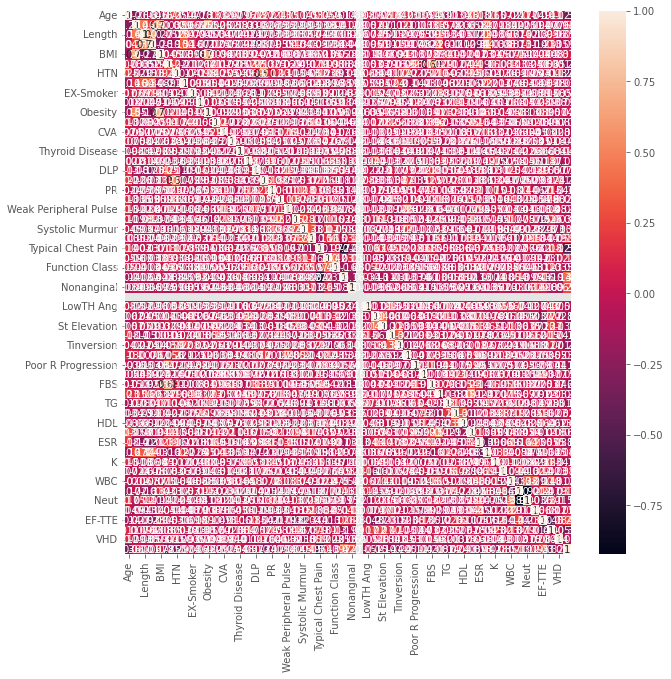

In [14]:
corr = df.corr()
top_corr = corr.index

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
corr.plot =sns.heatmap(df[top_corr].corr(), annot=True )

In [16]:
df.describe()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,0.580858,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,...,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462,1.930693,0.287129
std,10.392278,11.987358,9.327661,0.494235,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,...,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531,1.109180,0.453171
min,30.000000,48.000000,140.000000,0.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000,0.000000,0.000000
25%,51.000000,65.000000,158.000000,0.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000,1.000000,0.000000
50%,58.000000,74.000000,165.000000,1.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,...,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000,2.000000,0.000000
75%,66.000000,81.000000,171.000000,1.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,...,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000,3.000000,1.000000
max,86.000000,120.000000,188.000000,1.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000,3.000000,1.000000


In [17]:
df.duplicated().sum()


0

In [18]:
df.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
B

In [19]:
cat = ['DM', 'HTN', 'Typical Chest Pain', 'Atypical', 'Nonanginal', 'Tinversion']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


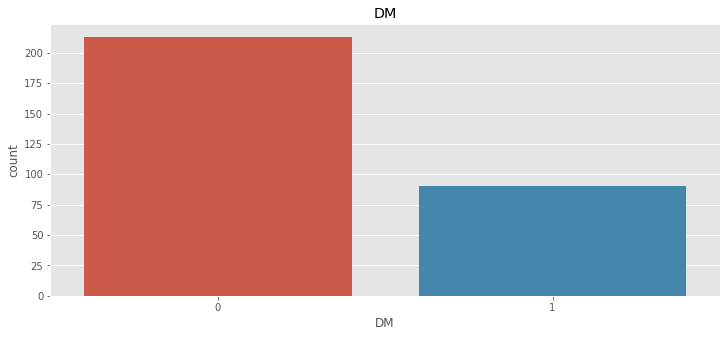

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


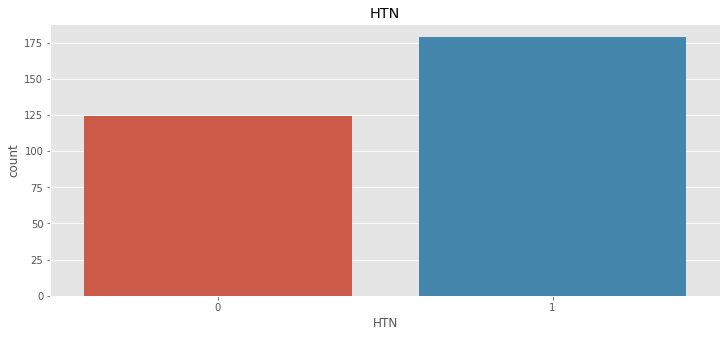

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


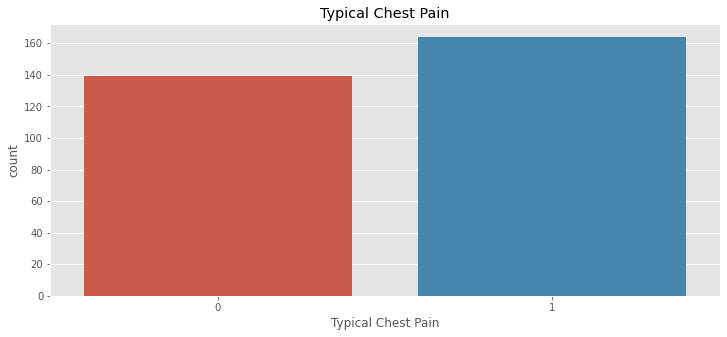

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


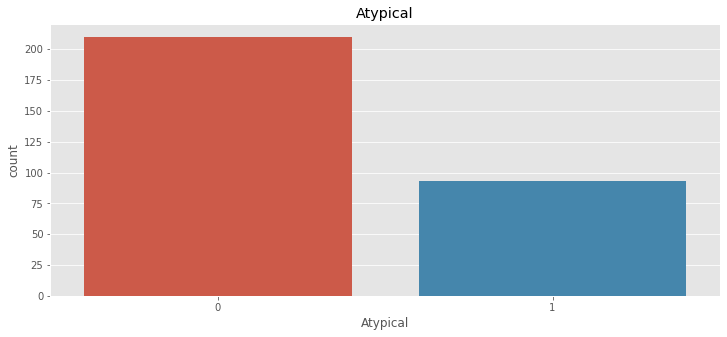

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


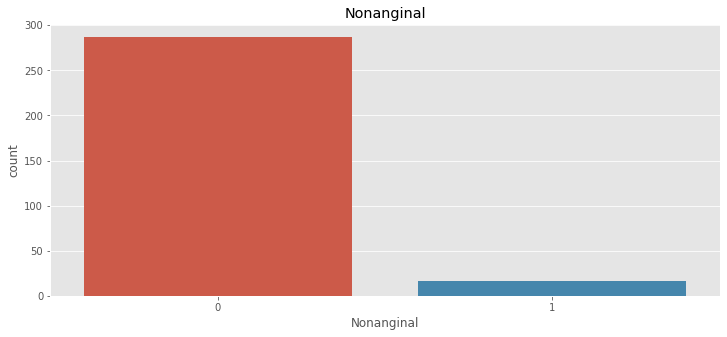

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


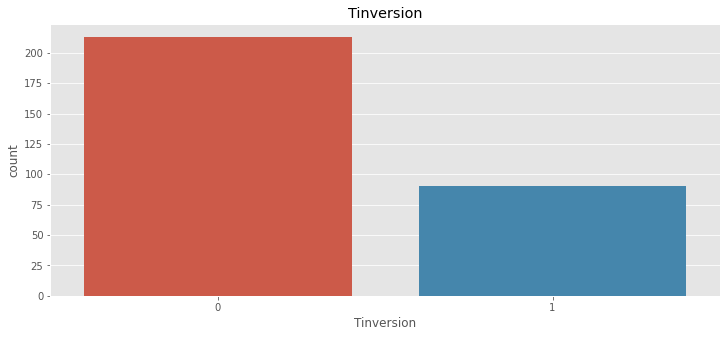

In [20]:
for column in cat:
  plt.figure(figsize=(12,5))
  plt.title(f"{column}")
  sns.countplot(df[column])
  plt.show()

In [21]:
numeric_col = ['Age', 'BMI', 'BP', 'FBS', 'TG', 'ESR', 'K', 'Lymph', 'EF-TTE','Region RWMA']


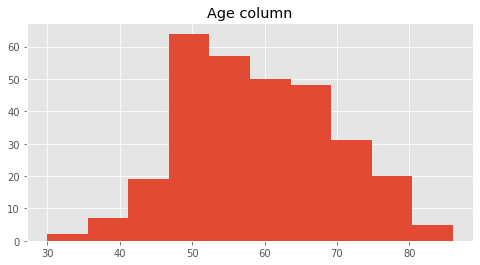

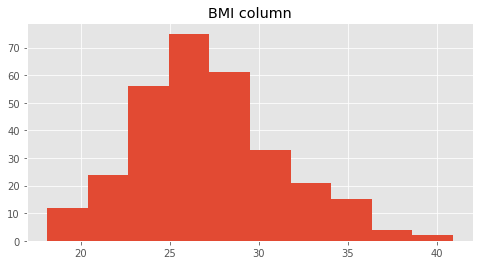

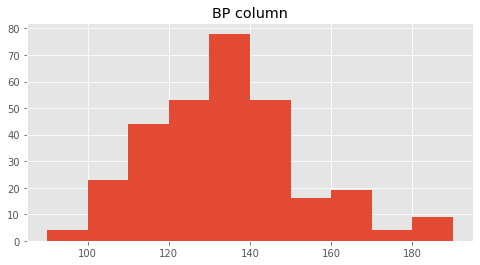

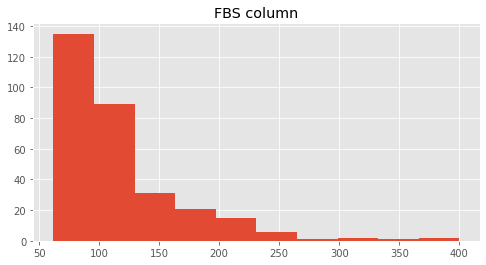

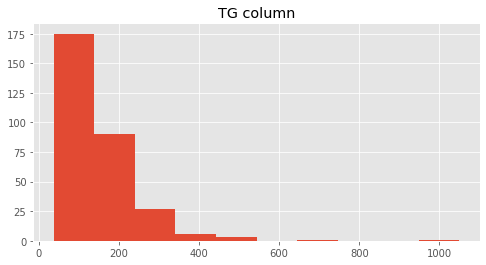

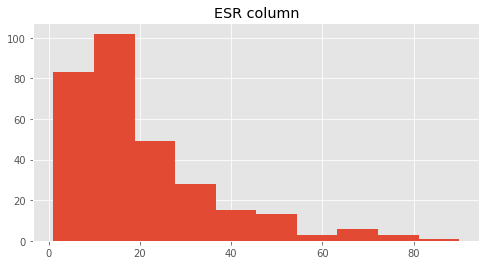

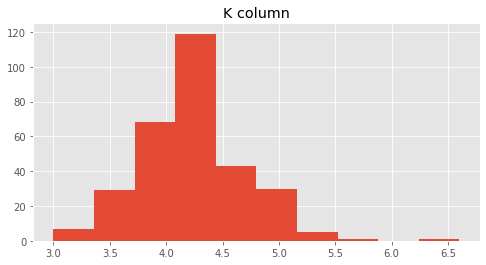

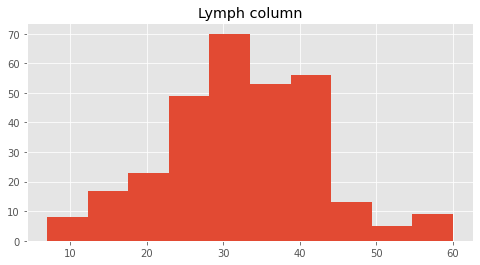

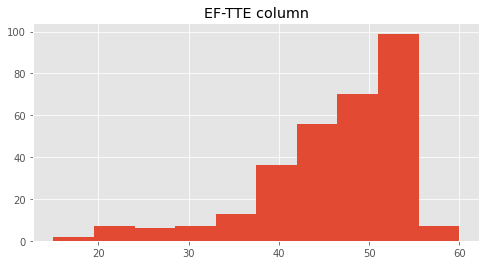

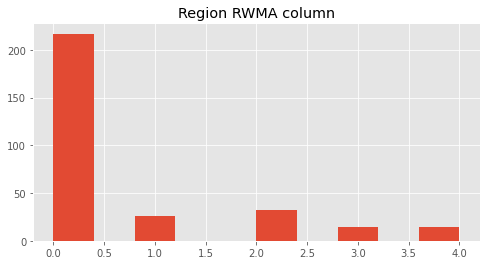

In [22]:
for column in numeric_col:
  plt.figure(figsize=(8,4))
  plt.title(f"{column} column")
  plt.hist(df[column])
  plt.show()

In [23]:
c=sel_feat
c

Index(['Age', 'Weight', 'Length', 'BMI', 'DM', 'HTN', 'BP',
       'Typical Chest Pain', 'Atypical', 'Nonanginal', 'Tinversion', 'FBS',
       'TG', 'ESR', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA'],
      dtype='object')

##Bavarient Analysis

Data Numerik vs Kategorik: Probability Density Distribution - Displot

<Figure size 1080x1080 with 0 Axes>

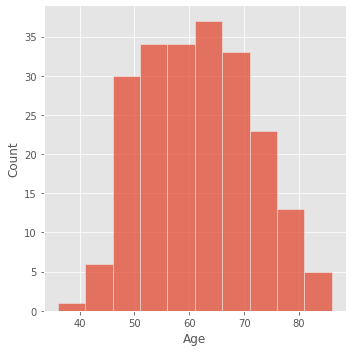

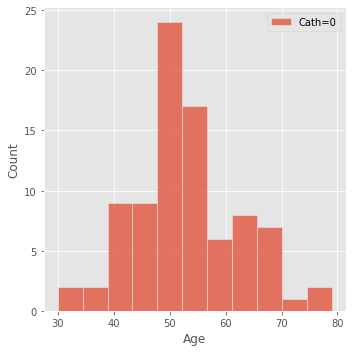

In [24]:
plt.figure(figsize=(15,15))
sns.displot(df['Age'][df['Cath']==0])
sns.displot(df['Age'][df['Cath']==1])
plt.legend(['Cath=0','Cath=1' ], loc='best')
plt.show()

**Kesimpulan:** Age bukan bukan faktor yang sangat berpengaruh untuk peynakit jantung(cath)

Karena kedua distribusi (cath=0 dan cath=1) terhadap age hampir overlapping satu sama lain. yang terkena cath dan yang normal hampir sama di jarak 50-55 yang keduanya cukup tinggi 


<Figure size 720x432 with 0 Axes>

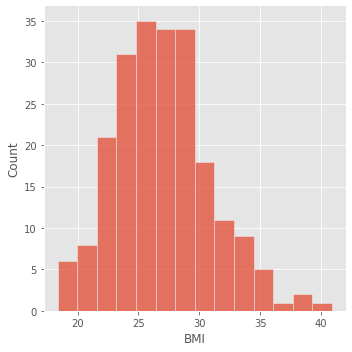

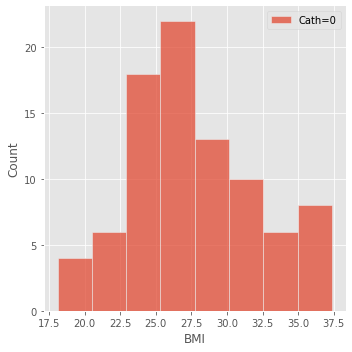

In [25]:
plt.figure(figsize=(10,6))
sns.displot(df['BMI'][df['Cath']==0])
sns.displot(df['BMI'][df['Cath']==1])
plt.legend(['Cath=0', 'Cath=1'], loc='best')
plt.show()

Kesimpulan:


<Figure size 720x432 with 0 Axes>

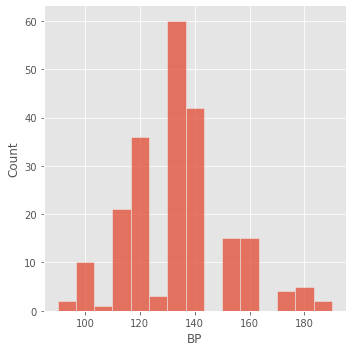

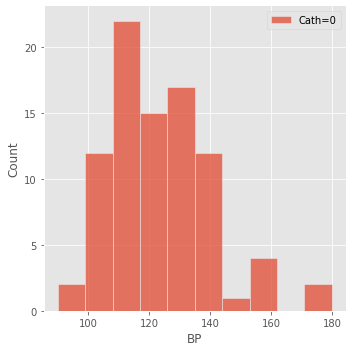

In [26]:
plt.figure(figsize=(10,6))
sns.displot(df['BP'][df['Cath']==0])
sns.displot(df['BP'][df['Cath']==1])
plt.legend(['Cath=0', 'Cath=1'], loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

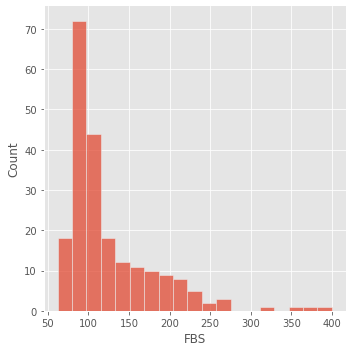

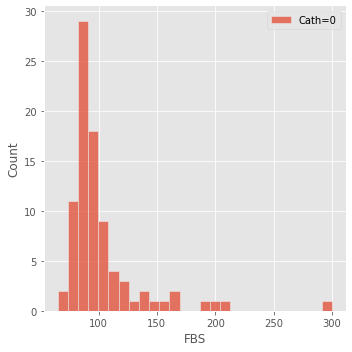

In [27]:
plt.figure(figsize=(10,6))
sns.displot(df['FBS'][df['Cath']==0])
sns.displot(df['FBS'][df['Cath']==1])
plt.legend(['Cath=0', 'Cath=1'], loc='best')
plt.show()


<Figure size 720x432 with 0 Axes>

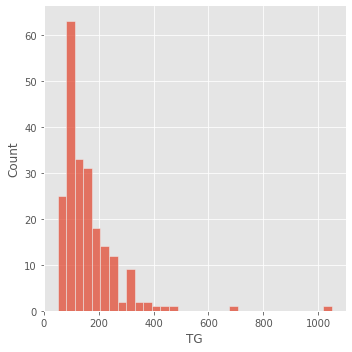

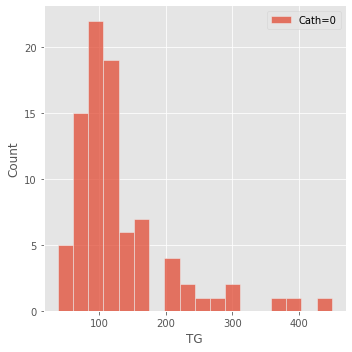

In [28]:
plt.figure(figsize=(10,6))
sns.displot(df['TG'][df['Cath']==0])
sns.displot(df['TG'][df['Cath']==1])
plt.legend(['Cath=0', 'Cath=1'], loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

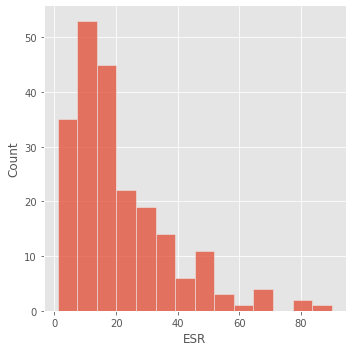

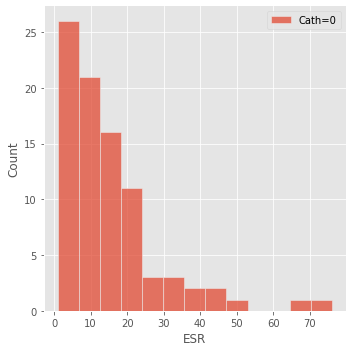

In [29]:
plt.figure(figsize=(10,6))
sns.displot(df['ESR'][df['Cath']==0])
sns.displot(df['ESR'][df['Cath']==1])
plt.legend(['Cath=0', 'Cath=1'], loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

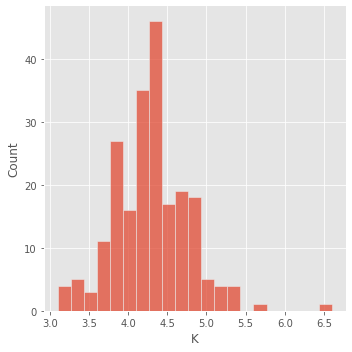

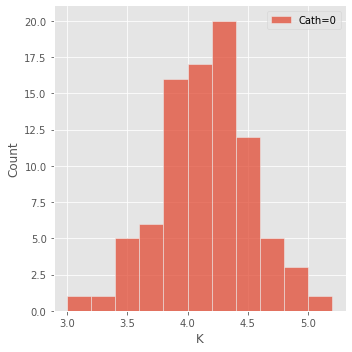

In [30]:
plt.figure(figsize=(10,6))
sns.displot(df['K'][df['Cath']==0])
sns.displot(df['K'][df['Cath']==1])
plt.legend(['Cath=0', 'Cath=1'], loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

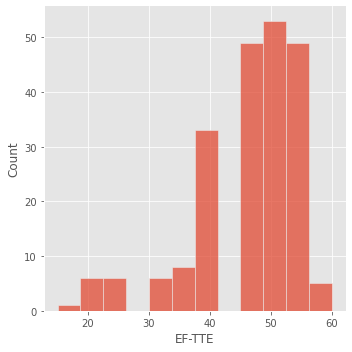

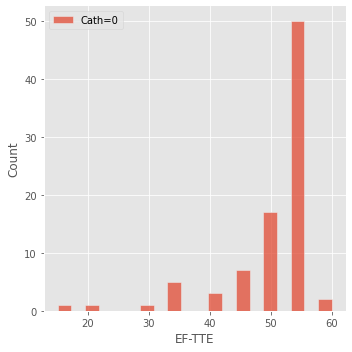

In [31]:
plt.figure(figsize=(10,6))
sns.displot(df['EF-TTE'][df['Cath']==0])
sns.displot(df['EF-TTE'][df['Cath']==1])
plt.legend(['Cath=0', 'Cath=1'], loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

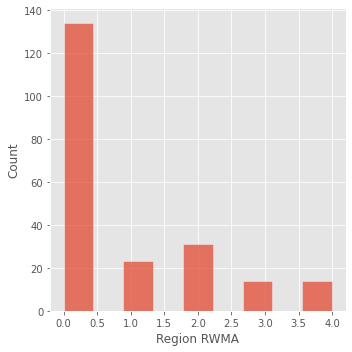

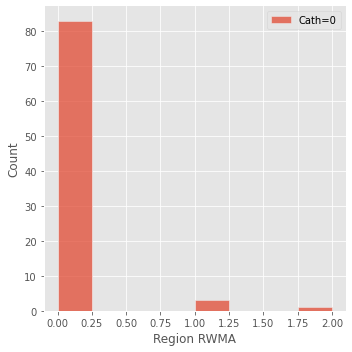

In [32]:
plt.figure(figsize=(10,6))
sns.displot(df['Region RWMA'][df['Cath']==0])
sns.displot(df['Region RWMA'][df['Cath']==1])
plt.legend(['Cath=0', 'Cath=1'], loc='best')
plt.show()

Data Kategorik vs Kategorik: Probability Density Distribution - Crosstab, Pivot Table

In [33]:
pivot = pd.crosstab(df['DM'], df['Cath'], margins=True)
pivot

Cath,0,1,All
DM,,,
0,136,77,213
1,80,10,90
All,216,87,303


In [34]:
ratio = pivot[1]/pivot['All']
ratio

DM
0      0.361502
1      0.111111
All    0.287129
dtype: float64

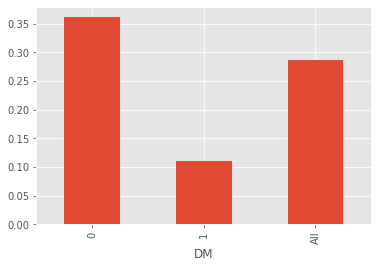

In [35]:
ratio.plot.bar()

**Kesimpulan:**
- diabetel meilitus : lebih banyak terkena cad
- tidak diabetes melilitus: lebih sedikit yang terkena cad


In [36]:
pivot = pd.crosstab(df['Sex'], df['Cath'], margins=True)
pivot

Cath,0,1,All
Sex,,,
0,86,41,127
1,130,46,176
All,216,87,303


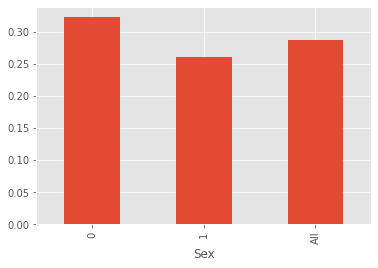

In [37]:
ratio = pivot[1]/pivot['All']
ratio.plot.bar()

Kesimpulan:

wanita lebih banyak terkena CAD dibanding pria.

#Multivariate Analysis

Data Numerik vs Numerik vs Kategorik

In [38]:
c


Index(['Age', 'Weight', 'Length', 'BMI', 'DM', 'HTN', 'BP',
       'Typical Chest Pain', 'Atypical', 'Nonanginal', 'Tinversion', 'FBS',
       'TG', 'ESR', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA'],
      dtype='object')

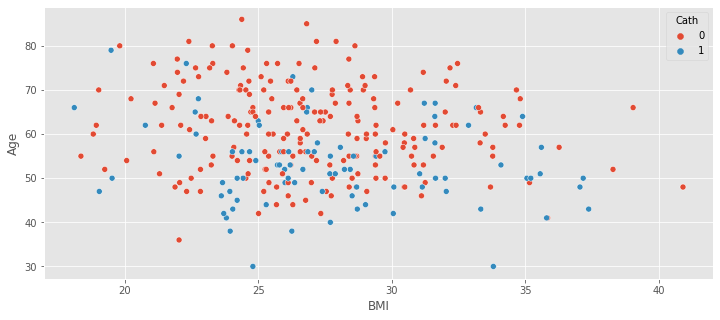

In [39]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI', y='Age', hue='Cath', data=df)
plt.show()

**Keseimpulan:**

- Pasien dengan umur 40-80 cenderung Terkena CAD
- Pasien dengan BMI < 35 cenderung Terkena CAD

**Data Kategorik vs Kategorik vs Numerik**

Menggunakan: boxplot, pointplot, atau swarmplot

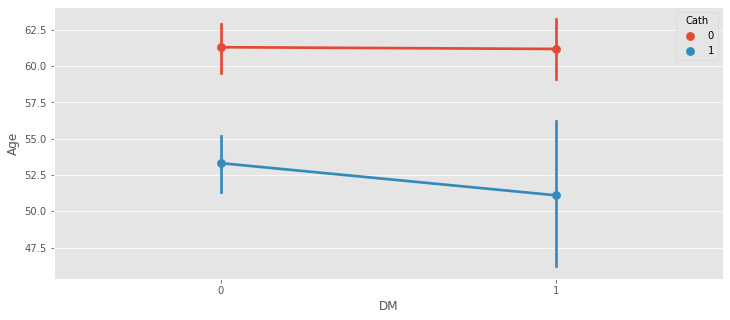

In [40]:
plt.figure(figsize=(12,5))
sns.pointplot(x='DM', y='Age', hue='Cath', data=df)
plt.show()

**Keseimpulan:**

Bisa mendapatkan umur rata-rata pasien yang terkena cad.
- Umur **rata-rata** pasien yang  terkena cad adalah 60 tahun.
- Umur **rata-rata** pasien yang  terkena memiliki kemungkinan kecil terkena cad adalah dibawah 52 tahun.

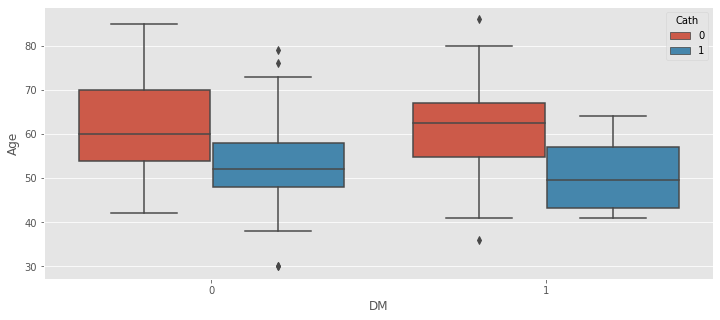

In [41]:
plt.figure(figsize=(12,5))
sns.boxplot(x='DM', y='Age', hue='Cath', data=df)
plt.show()

In [42]:
df.corr()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
Age,1.000000,-0.264585,-0.163753,-0.045769,-0.161414,0.072543,0.246690,-0.143879,0.076608,-0.183900,...,0.154203,-0.071886,0.020398,-0.171529,0.173030,-0.049500,-0.140512,0.108663,0.117735,-0.357247
Weight,-0.264585,1.000000,0.460631,0.234529,0.725005,-0.003531,-0.028532,0.157385,0.068977,0.021963,...,-0.018287,0.013916,-0.020214,0.020120,-0.051093,-0.094192,0.026789,-0.007648,-0.092527,0.066833
Length,-0.163753,0.460631,1.000000,0.700279,-0.269356,-0.052318,-0.153668,0.335248,0.079034,0.004488,...,-0.086277,-0.066590,0.066658,-0.156436,0.115075,-0.133446,-0.093295,0.095715,-0.085441,-0.001024
Sex,-0.045769,0.234529,0.700279,1.000000,-0.284088,-0.194348,-0.149278,0.336330,0.156932,-0.071098,...,-0.038046,-0.079913,0.086823,-0.132539,0.112422,-0.143698,-0.230896,0.128955,-0.059207,-0.067041
BMI,-0.161414,0.725005,-0.269356,-0.284088,1.000000,0.045360,0.091652,-0.089398,0.005016,0.014045,...,0.044587,0.067402,-0.074928,0.139583,-0.140037,-0.003964,0.093903,-0.079739,-0.037365,0.078189
DM,0.072543,-0.003531,-0.052318,-0.194348,0.045360,1.000000,0.217864,-0.208458,-0.120087,-0.064434,...,0.100064,-0.083030,0.110345,0.033413,-0.024417,0.051054,-0.052507,0.064891,0.001550,-0.252897
HTN,0.246690,-0.028532,-0.153668,-0.149278,0.091652,0.217864,1.000000,-0.169000,0.041045,-0.098467,...,0.011826,0.036355,-0.069374,0.017204,-0.025476,-0.043840,0.031365,-0.000372,0.117629,-0.287761
Current Smoker,-0.143879,0.157385,0.335248,0.336330,-0.089398,-0.208458,-0.169000,1.000000,-0.094652,0.089532,...,-0.016599,0.036812,0.046205,-0.053224,0.042115,-0.048473,-0.068943,0.078479,-0.092783,-0.073504
EX-Smoker,0.076608,0.068977,0.079034,0.156932,0.005016,-0.120087,0.041045,-0.094652,1.000000,-0.080152,...,-0.004318,-0.038716,-0.057655,0.070524,-0.068122,-0.079102,-0.015153,0.012996,-0.005121,-0.035578
FH,-0.183900,0.021963,0.004488,-0.071098,0.014045,-0.064434,-0.098467,0.089532,-0.080152,1.000000,...,-0.017255,-0.113749,0.067973,-0.014679,0.040786,-0.023000,0.089157,-0.038230,-0.078958,-0.035605


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


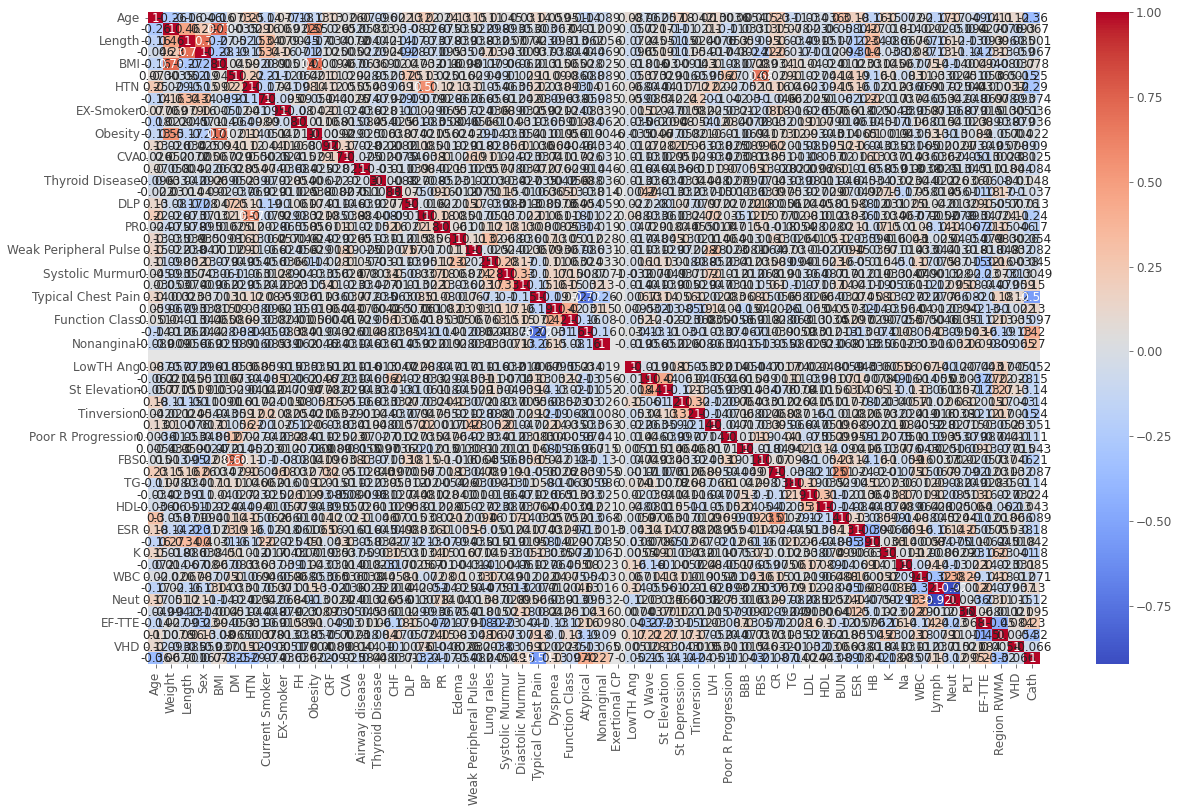

In [43]:
font = {'size':12, 'family':'normal'}
matplotlib.rc('font', **font)
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#Variabel Prediktor dan Target

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


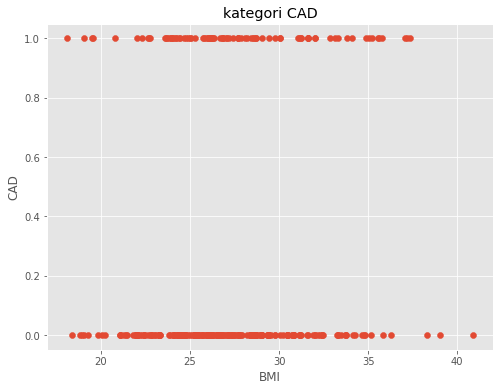

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(df['BMI'], df['Cath'])
plt.title('kategori CAD')
plt.xlabel('BMI')
plt.ylabel('CAD')
plt.show()

In [ ]:
df.corr()

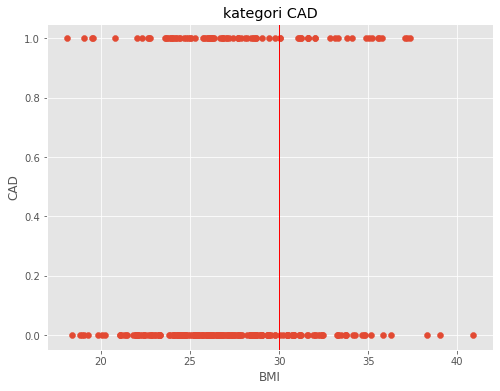

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(df['BMI'], df['Cath'])
plt.axvline(x=30, linewidth='1', color='r')
plt.title('kategori CAD')
plt.xlabel('BMI')
plt.ylabel('CAD')
plt.show()



Kurang Cocok untuk linier regresion


#Logistic Regresion


In [49]:
import statsmodels as sm
import sklearn.preprocessing as preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from scipy import stats

In [50]:
df.shape

(303, 56)

In [51]:
c

Index(['Age', 'Weight', 'Length', 'BMI', 'DM', 'HTN', 'BP',
       'Typical Chest Pain', 'Atypical', 'Nonanginal', 'Tinversion', 'FBS',
       'TG', 'ESR', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA'],
      dtype='object')

In [52]:
x_feats = ['Age', 'Weight', 'BMI', 'DM', 'HTN', 'BP', 'Typical Chest Pain',
       'Atypical', 'Nonanginal', 'Tinversion', 'FBS', 'TG', 'ESR', 'K',
       'Lymph', 'EF-TTE', 'Region RWMA']
X = pd.get_dummies(df[x_feats], drop_first=True, dtype=float)

y = pd.get_dummies(df['Cath'], drop_first=True, dtype=float)


In [53]:
X.head()

,Age,Weight,BMI,DM,HTN,BP,Typical Chest Pain,Atypical,Nonanginal,Tinversion,FBS,TG,ESR,K,Lymph,EF-TTE,Region RWMA
0,53,90,29.387755,0,1,110,0,0,0,1,90,250,7,4.7,39,50,0
1,67,70,28.398718,0,1,140,1,0,0,1,80,309,26,4.7,38,40,4
2,54,54,20.077335,0,0,100,1,0,0,0,85,103,10,4.7,38,40,2
3,66,67,26.838648,0,1,100,0,0,1,0,78,63,76,4.4,18,55,0
4,50,87,37.165193,0,1,110,0,0,0,0,104,170,27,4.0,55,50,0


In [54]:
import statsmodels.api as sm

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.236021
         Iterations 9


In [55]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      1   No. Observations:                  303
Model:                          Logit   Df Residuals:                      285
Method:                           MLE   Df Model:                           17
Date:                Sun, 20 Mar 2022   Pseudo R-squ.:                  0.6063
Time:                        01:59:22   Log-Likelihood:                -71.514
converged:                       True   LL-Null:                       -181.67
Covariance Type:            nonrobust   LLR p-value:                 2.288e-37
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.1623      4.454      2.506      0.012       2.432      19.893
Age                   -0.0991      0.026     -3.785      0.000      -0.150      -0.048
Weight              

In [56]:
log_reg_model = LogisticRegression(fit_intercept=False, solver='liblinear')

log_reg_model.fit(X, y)

LogisticRegression(fit_intercept=False, solver='liblinear')

In [57]:
log_reg_model.coef_

array([[ 6.94473854e-01, -6.14942034e-02, -2.46354358e-02,
         1.44491120e-01, -9.56204611e-01, -1.02846076e+00,
        -2.19869163e-03, -2.41949839e+00,  1.87515555e-01,
         1.26077506e+00, -1.15097085e+00, -3.34050665e-03,
        -6.29330511e-03, -1.82767817e-02,  1.64819177e-01,
         1.83865976e-02,  5.11959710e-02, -1.21071102e+00]])

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [59]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)


In [60]:
X.shape

(10, 1)

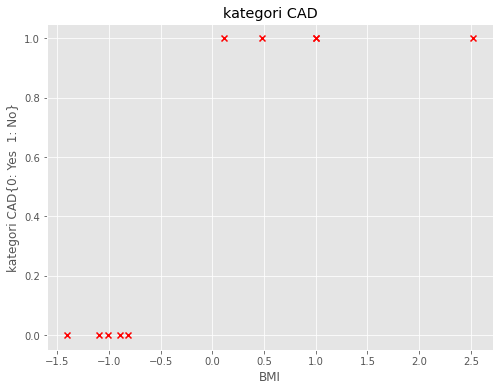

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
plt.ylabel("kategori CAD{0: Yes  1: No}")
plt.title('kategori CAD')
plt.xlabel('BMI')
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

z = np.linspace(-2, 2, 1000)
z_predict = lin_reg.intercept_ + (lin_reg.coef_ * z)

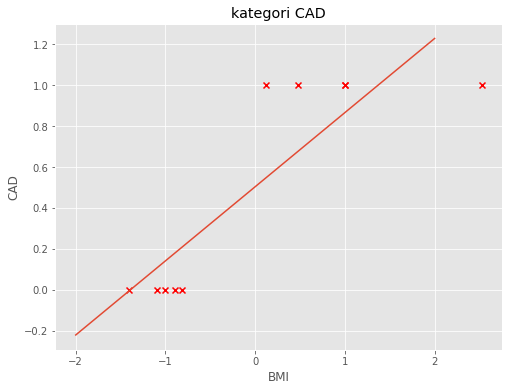

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.ylabel("kategori CAD{0: Yes  1: No}")
plt.title('kategori CAD')
plt.xlabel('BMI')
plt.ylabel('CAD')
plt.show()

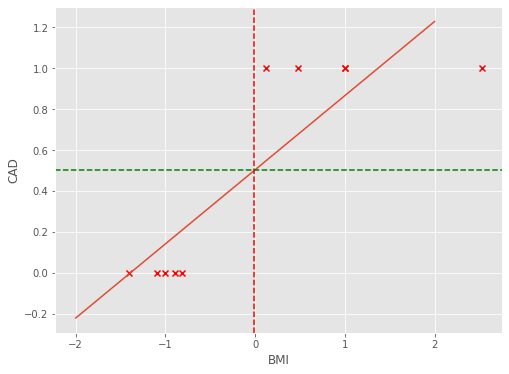

In [65]:
x_critical = (0.5 - lin_reg.intercept_)/ lin_reg.coef_

plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.ylabel("kategori CAD{0: Yes  1: No}")
plt.xlabel('BMI')
plt.ylabel('CAD')
plt.show()

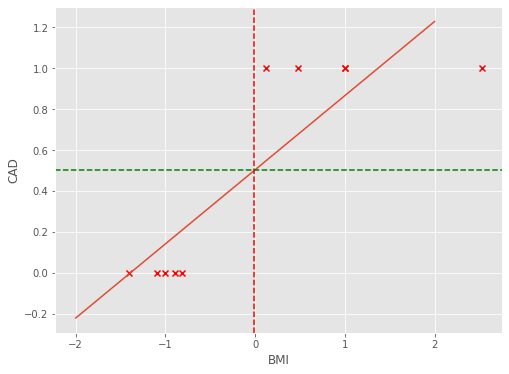

In [66]:
x_critical = (0.5 - lin_reg.intercept_)/ lin_reg.coef_

plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.xlabel('BMI')
plt.ylabel('CAD')
plt.show()

In [67]:
new_obs = 20
X = np.vstack([X, new_obs])
y = np.append(y, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

z = np.linspace(-2, new_obs, 1000)

z_predict = lin_reg.intercept_ + (lin_reg.coef_ * z)
x_critical2 = (0.5 - lin_reg.intercept_)/ lin_reg.coef_

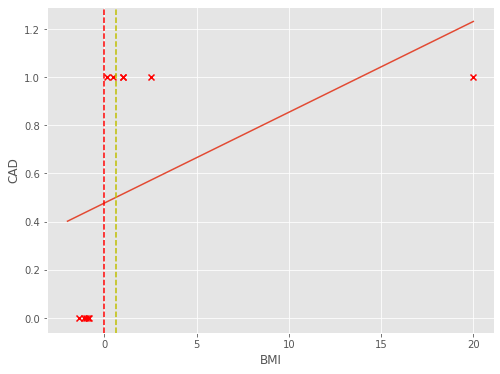

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axvline(x=x_critical2, color='y', linestyle='--')
plt.ylabel("kategori CAD{0: Yes  1: No}")
plt.xlabel('BMI')
plt.ylabel('CAD')
plt.show()

In [69]:
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

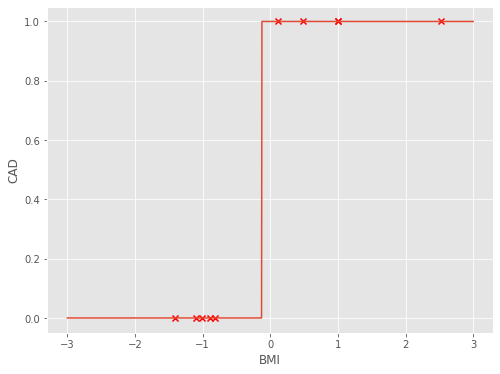

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-3, 3, 1000).reshape(1000,1)
yt = log_reg.predict(xt)
plt.plot(xt, yt)
plt.xlabel('BMI')
plt.ylabel('CAD')
plt.show()

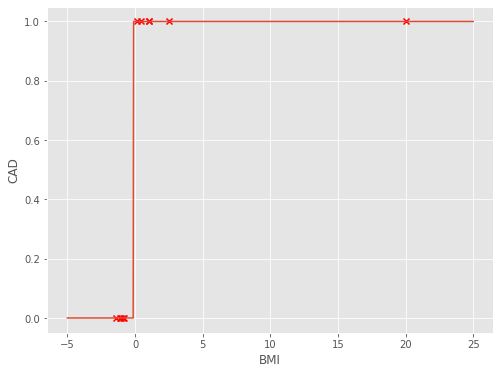

In [71]:
new_obs = 20
X = np.vstack([X, new_obs])
y = np.append(y, 1)

log_reg.fit(X, y)

plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-5, 25, 1000).reshape(1000,1)
yt = log_reg.predict(xt)
plt.plot(xt, yt)
plt.xlabel('BMI')
plt.ylabel('CAD')
plt.show()

#Decision Tree

#Decision Tree Classification

In [72]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

In [75]:
X = df.drop(columns=['Cath'],axis=1)
y = df['Cath']

X.shape, y.shape

((303, 55), (303,))

In [76]:
print(X)
print(y)

     Age  Weight  Length  Sex        BMI  DM  HTN  Current Smoker  EX-Smoker  \
0     53      90     175    1  29.387755   0    1               1          0   
1     67      70     157    0  28.398718   0    1               0          0   
2     54      54     164    1  20.077335   0    0               1          0   
3     66      67     158    0  26.838648   0    1               0          0   
4     50      87     153    0  37.165193   0    1               0          0   
..   ...     ...     ...  ...        ...  ..  ...             ...        ...   
298   58      84     168    1  29.761905   0    0               0          0   
299   55      64     152    0  27.700831   0    0               0          0   
300   48      77     160    0  30.078125   0    1               0          0   
301   57      90     159    0  35.599858   1    0               0          0   
302   56      85     170    0  29.411765   0    1               1          0   

     FH  ...    HB    K   Na    WBC  Ly

In [227]:
from sklearn.model_selection import train_test_split       # Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)

(203, 55)
(100, 55)


In [238]:
from sklearn.tree import DecisionTreeClassifier

# Buat model decision tree
clf = DecisionTreeClassifier(criterion='gini')

# Fit model ke data latih dan label latih
clf.fit(X_train, y_train)

# Lakukan prediksi pada data latih
pred_training = clf.predict(X_train)

# Lakukan prediksi pada data uji
pred = clf.predict(X_test)

print(pred_training)
print(pred)

[0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1]
[1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0]


In [239]:
from sklearn.metrics import accuracy_score

accuracy_training = accuracy_score(y_train, pred_training)
accuracy = accuracy_score(y_test, pred)

print('Akurasi pada data latih', accuracy_training)
print('Akurasi pada data uji', accuracy)


Akurasi pada data latih 1.0
Akurasi pada data uji 0.81


In [119]:
c


Index(['Age', 'Weight', 'Length', 'BMI', 'DM', 'HTN', 'BP',
       'Typical Chest Pain', 'Atypical', 'Nonanginal', 'Tinversion', 'FBS',
       'TG', 'ESR', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA'],
      dtype='object')

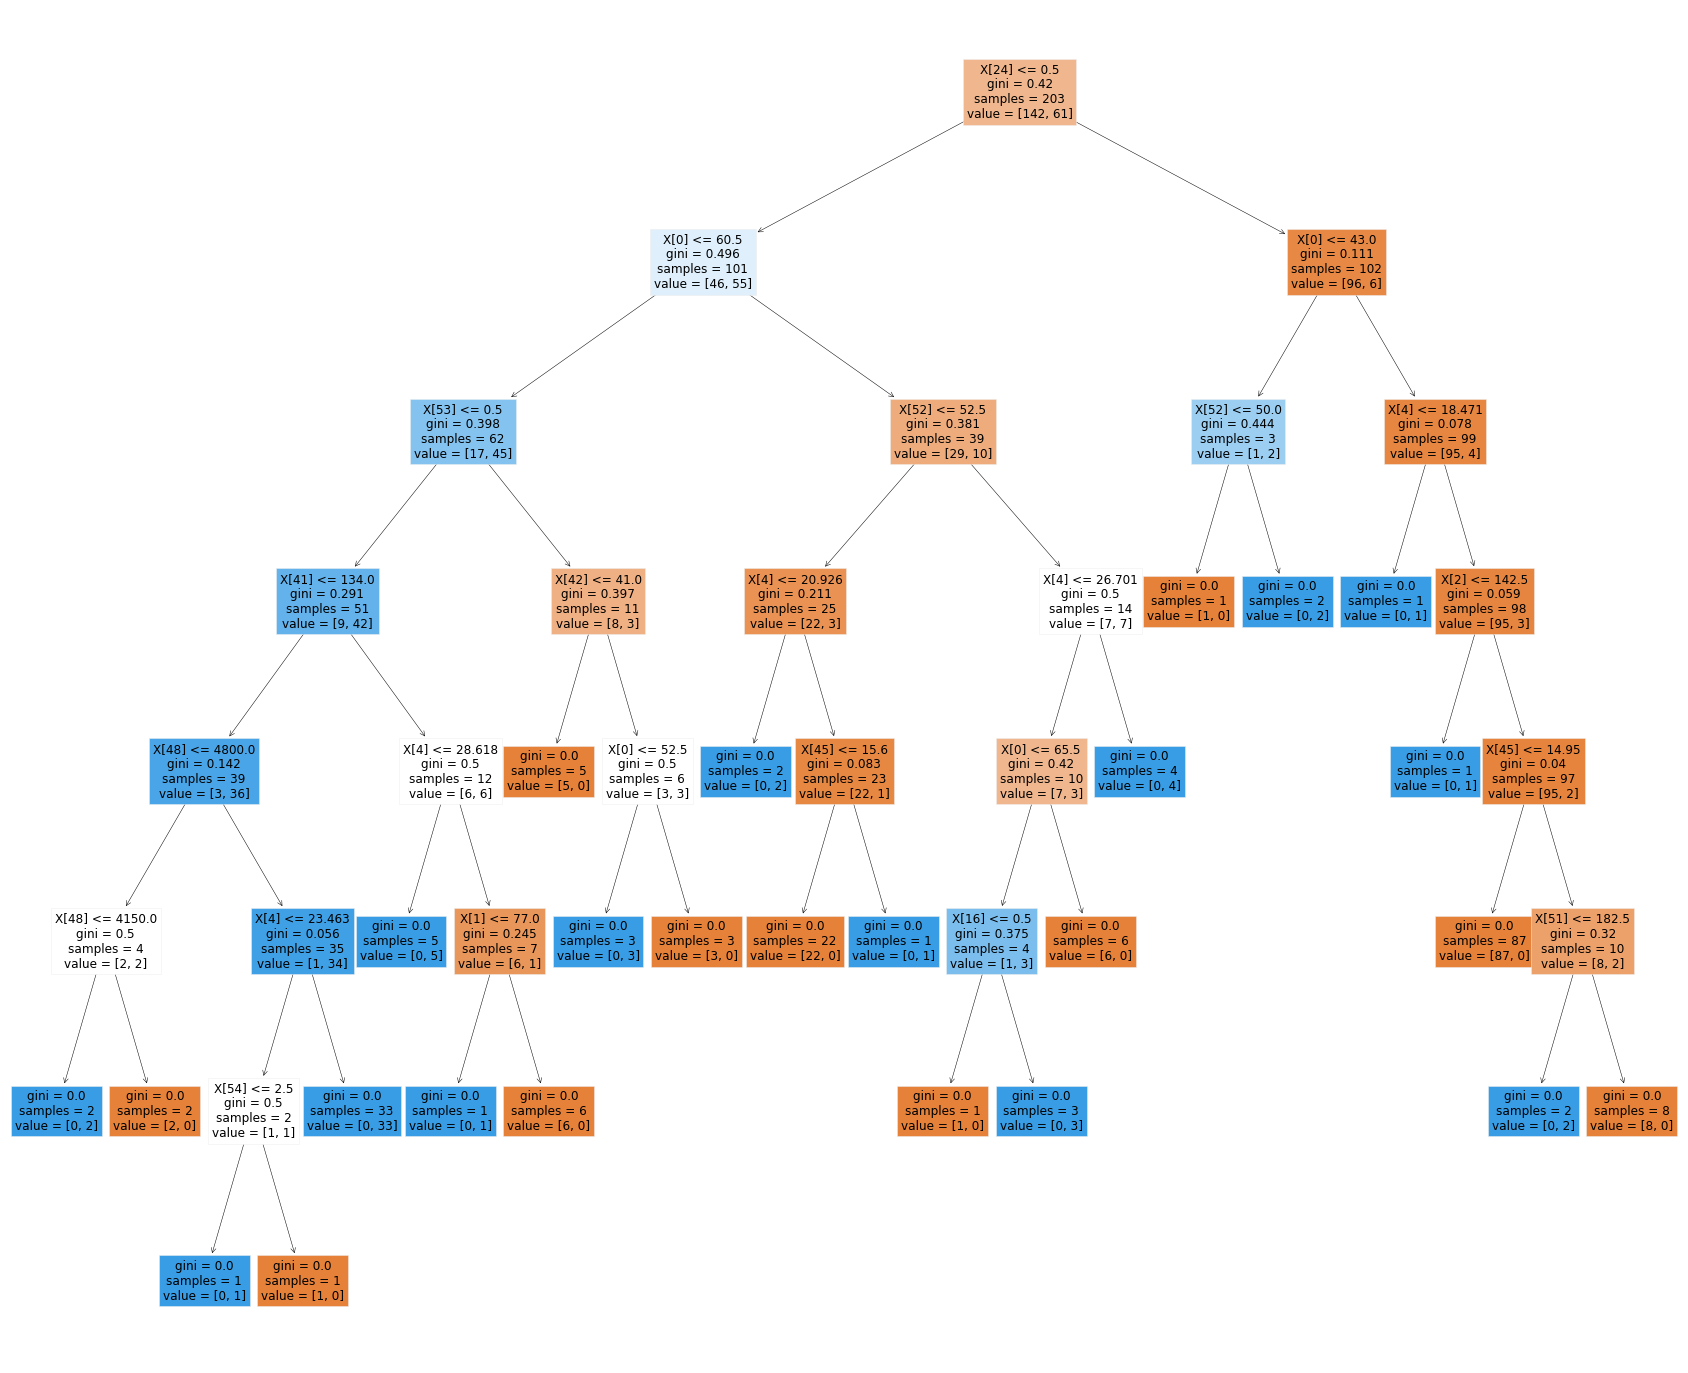

In [247]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(30,25))
tree.plot_tree(clf, filled=True, fontsize=12)
plt.show()

Decesion Tree Regression

In [170]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [171]:
features_train.shape, features_test.shape

((212, 55), (91, 55))

In [271]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])

In [279]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(features_train, labels_train.values)

y_pred = decision_tree.predict(features_test)

In [283]:
import pandas as pd
from sklearn.model_selection import train_test_split

df.head()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xnorm = pd.DataFrame(data = scaler.fit_transform(X))
yshape = pd.DataFrame(data = y)
Xshape = pd.DataFrame(data=X)
Ynorm = pd.DataFrame(data = scaler.fit_transform(Yshape))
XTrain,XTest,YTrain,YTest=train_test_split(Xnorm,Ynorm,train_size=0.7,random_state=2)

In [287]:
result = pd.DataFrame({'Real Values':labels_test, 'Predicted Values':y_pred})


result.sample(10)

,Real Values,Predicted Values
198,0,0
302,0,0
175,1,0
64,1,1
253,0,0
52,0,0
8,1,1
146,0,0
153,1,0
261,1,1


In [294]:
features = df.drop(columns=['Cath'],axis=1)
labels = df['Cath']

features.shape, labels.shape

((303, 55), (303,))

In [295]:
print(features)
print(labels)

     Age  Weight  Length  Sex        BMI  DM  HTN  Current Smoker  EX-Smoker  \
0     53      90     175    1  29.387755   0    1               1          0   
1     67      70     157    0  28.398718   0    1               0          0   
2     54      54     164    1  20.077335   0    0               1          0   
3     66      67     158    0  26.838648   0    1               0          0   
4     50      87     153    0  37.165193   0    1               0          0   
..   ...     ...     ...  ...        ...  ..  ...             ...        ...   
298   58      84     168    1  29.761905   0    0               0          0   
299   55      64     152    0  27.700831   0    0               0          0   
300   48      77     160    0  30.078125   0    1               0          0   
301   57      90     159    0  35.599858   1    0               0          0   
302   56      85     170    0  29.411765   0    1               1          0   

     FH  ...    HB    K   Na    WBC  Ly

In [296]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.4, random_state=0)

print(features.shape)
print(labels.shape)

(303, 55)
(303,)


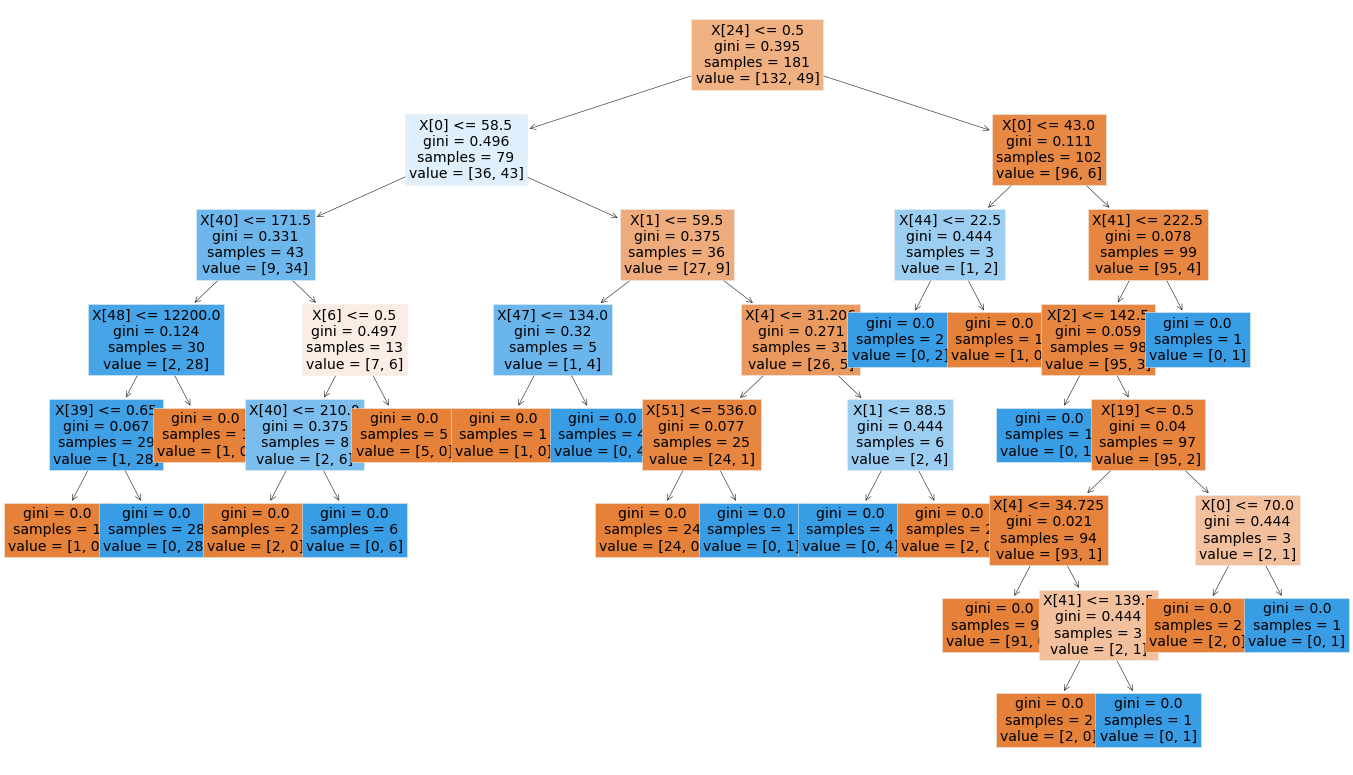

In [299]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(features_train, labels_train)

plt.figure(figsize=(24,14))
tree.plot_tree(clf,  filled=True, fontsize=14)
plt.show()

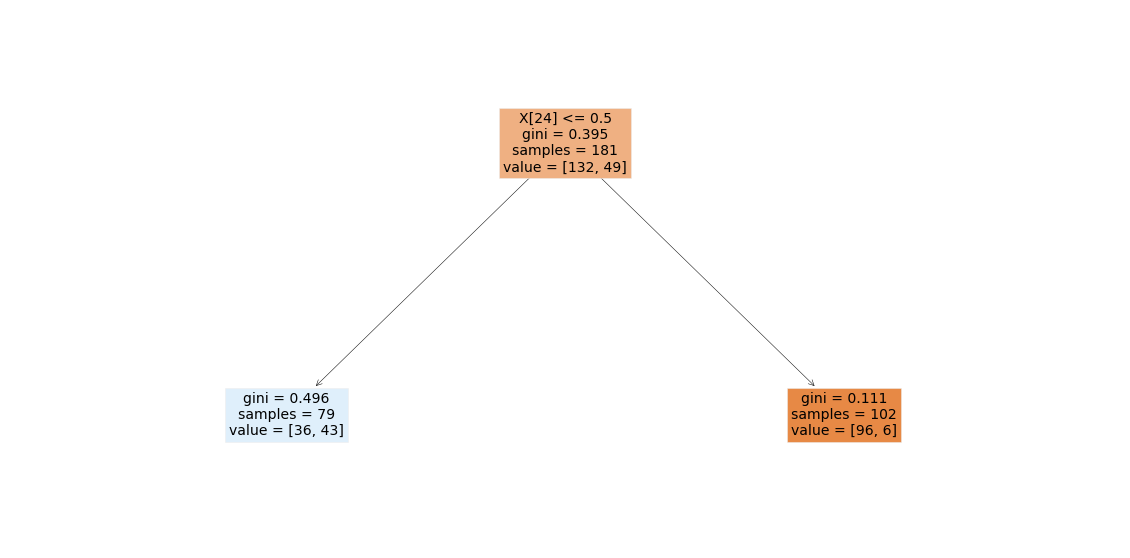

In [304]:
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.1)
clf.fit(features_train, labels_train)

plt.figure(figsize=(20,10))
tree.plot_tree(clf,  filled=True, fontsize=14)
plt.show()

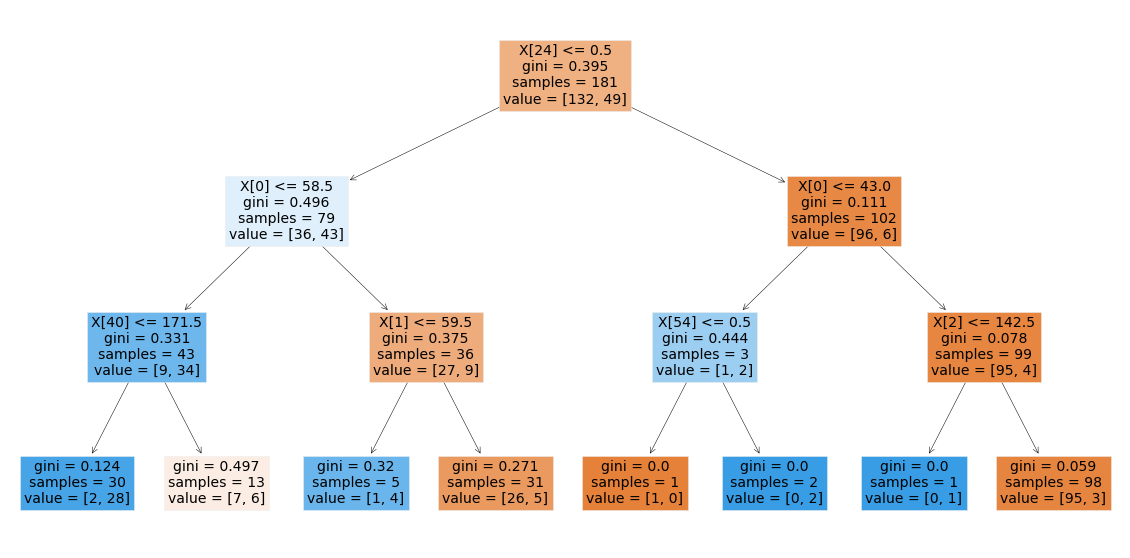

In [303]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(features_train, labels_train)

plt.figure(figsize=(20,10))
tree.plot_tree(clf,  filled=True, fontsize=14)
plt.show()

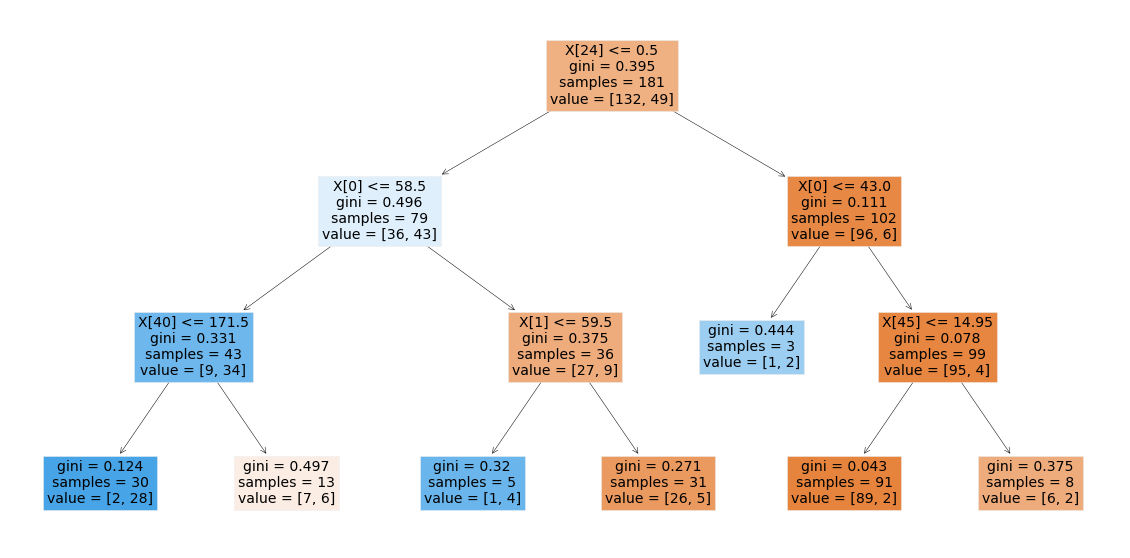

In [310]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
clf.fit(features_train, labels_train)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

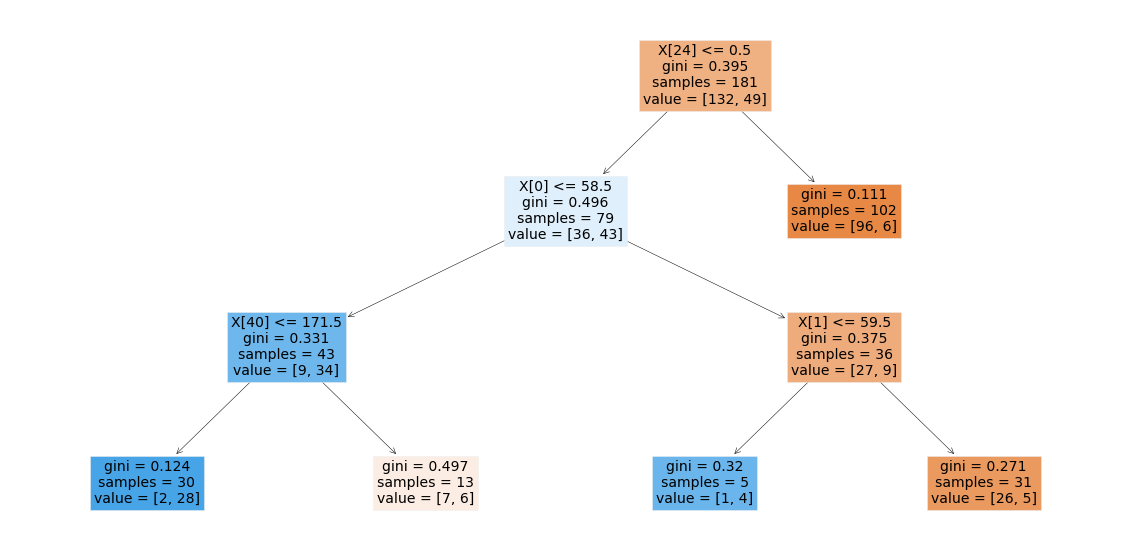

In [314]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(features_train, labels_train)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

#Ensemble Learning

Voting Ensembles

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [320]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Buat model indiviual
logreg_clf = LogisticRegression()
decision_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()

In [321]:
# Implementasi Hard Voting
voting_clf_hard = VotingClassifier(estimators=[('Logistic Regression', logreg_clf), ('Decision Tree', decision_clf), ('k-NN', knn_clf)], voting='hard')
voting_clf_hard.fit(X_train, y_train)

# Performa model
y_pred_hard = voting_clf_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)

In [322]:
# Implementasi Soft Voting
voting_clf_soft = VotingClassifier(estimators=[('Logistic Regression', logreg_clf), ('Decision Tree', decision_clf), ('k-NN', knn_clf)], voting='soft')
voting_clf_soft.fit(X_train, y_train)

# Performa model
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)


In [323]:
print('Hard voting accuracy:', accuracy_hard)
print('Soft voting accuracy:', accuracy_soft)

Hard voting accuracy: 0.7692307692307693
Soft voting accuracy: 0.8021978021978022


#Bagging (Bootstrap Aggregating) Ensemble

In [324]:
from sklearn.tree import DecisionTreeClassifier

decision_clf = DecisionTreeClassifier()

# Fitting single Decision Tree
decision_clf.fit(X_train, y_train)

y_pred_decision = decision_clf.predict(X_test)
score_dt = accuracy_score(y_test, y_pred_decision)

In [326]:

from sklearn.ensemble import BaggingClassifier

# Fitting bagging classifier with Decision Tree
bagging_clf = BaggingClassifier(base_estimator=decision_clf)
bagging_clf.fit(X_train, y_train)

y_pred_bagging = bagging_clf.predict(X_test)
score_bc_lr = accuracy_score(y_test, y_pred_bagging)

In [327]:
print('Single Decision Tree accuracy:', score_dt)
print('Bagging with Decision Tree accuracy:', score_bc_lr)

Single Decision Tree accuracy: 0.8131868131868132
Bagging with Decision Tree accuracy: 0.8681318681318682


#Random Forest

In [361]:
from sklearn.ensemble import RandomForestClassifier

ranfor_clf_1 = RandomForestClassifier(min_samples_leaf=2)
ranfor_clf_1.fit(X_train,y_train)

ranfor_clf_2 = RandomForestClassifier(max_leaf_nodes=5)
ranfor_clf_2.fit(X_train,y_train)

# Performa
y_pred_ranfor_1 = ranfor_clf_1.predict(X_test)
score_ranfor_1 = accuracy_score(y_test, y_pred_ranfor_1)

y_pred_ranfor_2 = ranfor_clf_2.predict(X_test)
score_ranfor_2 = accuracy_score(y_test, y_pred_ranfor_2)

In [362]:
print('Random forest accuracy with min_sample_leaf 2:', score_ranfor_1)
print('Random forest accuracy with max_leaf_nodes 5:', score_ranfor_2)

Random forest accuracy with min_sample_leaf 2: 0.8552631578947368
Random forest accuracy with max_leaf_nodes 5: 0.8157894736842105


#Stacking Ensemble

In [330]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('log_reg', LogisticRegression()),
    ('dt', DecisionTreeClassifier(max_leaf_nodes=5))
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(max_leaf_nodes=5))
stacking_clf.fit(X_train, y_train)

y_pred_bagging = stacking_clf.predict(X_test)
score_sc_lr = accuracy_score(y_test, y_pred_bagging)

In [331]:
print('Stacking accuracy:', score_sc_lr)

Stacking accuracy: 0.8681318681318682


#AdaBoost

In [332]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=2))
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)
score_ada = accuracy_score(y_test, y_pred_ada)

In [333]:
print('AdaBoost accuracy:', score_ada)

AdaBoost accuracy: 0.8571428571428571


#Gradient Boosting

In [359]:
from sklearn.ensemble import GradientBoostingClassifier


gb_clf = GradientBoostingClassifier(n_estimators=200, min_samples_leaf=10, max_leaf_nodes=5, max_depth=1)
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)
score_gb = accuracy_score(y_test, y_pred_gb)

In [360]:
print('Gradient Boosting accuracy:', score_gb)

Gradient Boosting accuracy: 0.8421052631578947


#Hold Out Validation - Train and Test Split

In [337]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

train = clf.predict(X_train)
test = clf.predict(X_test)

acc_train = accuracy_score(y_train, train)
acc_test = accuracy_score(y_test, test)

print('Akurasi pelatihan:', acc_train)
print('Akurasi pengujian:', acc_test)

Akurasi pelatihan: 1.0
Akurasi pengujian: 0.7631578947368421


#K-Fold Cross Validation

In [338]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()

kfold = KFold(n_splits=10)
kfold_train = cross_val_score(clf, X_train, y_train, cv=kfold)

print(kfold_train)
print('\nRata-rata akurasi pelatihan pada K-Fold:', np.mean(kfold_train))
print('Akurasi pengujian:', acc_test)

[0.7826087  0.7826087  0.82608696 0.73913043 0.65217391 0.86956522
 0.86956522 0.77272727 0.90909091 0.86363636]

Rata-rata akurasi pelatihan pada K-Fold: 0.8067193675889328
Akurasi pengujian: 0.7631578947368421


#Repeated K-Fold Cross Validation

In [339]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()

re_kfold = RepeatedKFold(n_splits=10, n_repeats=2)
re_kfold_train = cross_val_score(clf, X_train, y_train, cv=re_kfold)

print(re_kfold_train)
print('\nRata-rata akurasi pelatihan pada Repeated K-Fold:', np.mean(re_kfold_train))
print('Akurasi pengujian:', acc_test)

[0.69565217 0.7826087  0.86956522 0.82608696 0.73913043 0.82608696
 0.69565217 0.77272727 0.72727273 0.72727273 0.82608696 0.95652174
 0.69565217 0.91304348 0.73913043 0.73913043 0.91304348 0.77272727
 0.86363636 0.77272727]

Rata-rata akurasi pelatihan pada Repeated K-Fold: 0.7926877470355731
Akurasi pengujian: 0.7631578947368421


#Stratified K-Fold Cross Validation

In [340]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()

stra_kfold = StratifiedKFold(n_splits=10)
stra_kfold_train = cross_val_score(clf, X_train, y_train, cv=stra_kfold)

print(stra_kfold_train)
print('\nRata-rata akurasi pelatihan pada Stratified K-Fold:', np.mean(stra_kfold_train))
print('Akurasi pengujian:', acc_test)

[0.7826087  0.86956522 0.82608696 0.69565217 0.56521739 0.91304348
 0.7826087  0.81818182 0.86363636 0.86363636]

Rata-rata akurasi pelatihan pada Stratified K-Fold: 0.7980237154150197
Akurasi pengujian: 0.7631578947368421


#Leave-P-Out (LPO \ LPOCV)

In [341]:
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()

# tentukan nilai p=int. Semakin besar akan semakin lama komputasinya
lpovc = LeavePOut(p=1)
lpovc.get_n_splits(X_train)

227

In [342]:
lpovc_train = cross_val_score(clf, X_train, y_train, cv=lpovc)

print(lpovc_train)
print('\nRata-rata akurasi pelatihan pada LPOVC:', np.mean(lpovc_train))
print('Akurasi pengujian:', acc_test)

[1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.]

Rata-rata akurasi pelatihan pada LPOVC: 0.7709251101321586
Akurasi pengujian: 0.7631578947368421


#Leave One Out (LOO / LOOCV)

In [343]:

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()

loovc = LeaveOneOut()
loovc_train = cross_val_score(clf, X_train, y_train, cv=loovc)

print(loovc_train)
print('\nRata-rata akurasi pelatihan pada LOOVC:', np.mean(loovc_train))
print('Akurasi pengujian:', acc_test)

[1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.]

Rata-rata akurasi pelatihan pada LOOVC: 0.7709251101321586
Akurasi pengujian: 0.7631578947368421


#Evaluasi Model
Metrik yang cocok pada data set ini ialah Gardien Boosting karen dilihat dari akurasi nya cukup tinggi di banding yang lain dengan akurasi 91% tetapi memiliki kekurangan disaat ada data set yang mudah gardien boosting akan tetap mengikuti jalur yang sulit untuk mengambil keputusan